In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/g-research-crypto-forecasting/example_sample_submission.csv
/kaggle/input/g-research-crypto-forecasting/asset_details.csv
/kaggle/input/g-research-crypto-forecasting/example_test.csv
/kaggle/input/g-research-crypto-forecasting/train.csv
/kaggle/input/g-research-crypto-forecasting/supplemental_train.csv
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/__init__.py


In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
import pandas as pd
import numpy as np

In [3]:
# load dataset
train = pd.read_csv("../input/g-research-crypto-forecasting/train.csv")
asset_details = pd.read_csv("../input/g-research-crypto-forecasting/asset_details.csv")
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   Asset_ID   int64  
 2   Count      float64
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Volume     float64
 8   VWAP       float64
 9   Target     float64
dtypes: float64(8), int64(2)
memory usage: 1.8 GB


In [5]:
mapping = dict(asset_details[['Asset_ID', 'Asset_Name']].values)
train["Asset name"] = train["Asset_ID"].map(mapping)

asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [6]:
# I Will use moving avg and simple moving AVG

In [7]:
#Extract Bitcoin data
temp = train.query("Asset_ID == 1").reset_index(drop = True) # bitcoin
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')

all_data = temp.groupby(['Asset_ID', 'Asset name']).resample('D', on='TIME', origin='start').agg(
    {"Open": "first", 
     "Close": "last", 
     "Low": "min", 
     "High": "max",
     "Volume": "last",
     "VWAP": "max"
    }
).dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]

all_data=all_data.reset_index()
all_data=all_data.set_index('TIME')
all_data.head(5)

,Asset_ID,Asset name,Open,High,Low,Close,Volume,VWAP
TIME,,,,,,,,
2018-01-01 00:01:00,1,Bitcoin,13835.194,14442.9,12750.00,13468.698,66.772577,13932.686211
2018-01-02 00:01:00,1,Bitcoin,13459.606,15500.0,12798.00,14743.424,87.582945,15251.921309
2018-01-03 00:01:00,1,Bitcoin,14739.148,15599.7,14150.00,15107.792,80.601941,15412.929986
2018-01-04 00:01:00,1,Bitcoin,15096.770,15500.1,13918.04,15158.492,97.776206,15383.149656
2018-01-05 00:01:00,1,Bitcoin,15158.346,17200.0,14600.00,16935.556,63.952918,17124.127038


In [8]:
temp.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset name,TIME
0,1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643,Bitcoin,2018-01-01 00:01:00
1,1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037,Bitcoin,2018-01-01 00:02:00
2,1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309,Bitcoin,2018-01-01 00:03:00
3,1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999,Bitcoin,2018-01-01 00:04:00
4,1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079,Bitcoin,2018-01-01 00:05:00


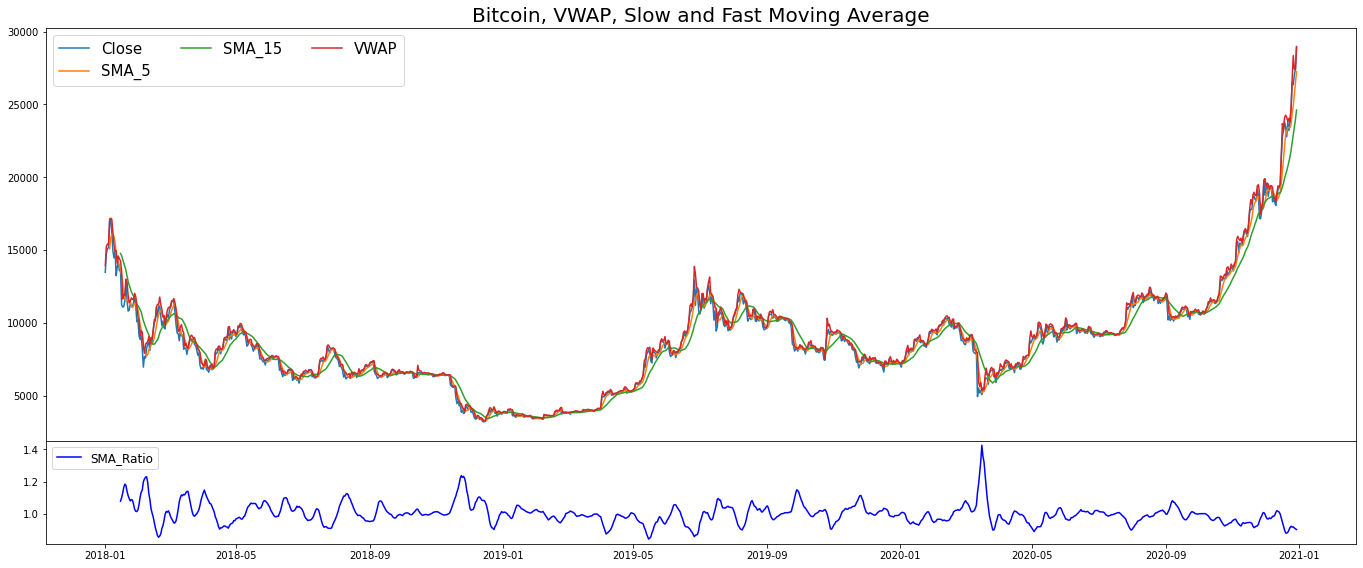

In [9]:
#Calculate SMA 5, 15
all_data['SMA_5'] = all_data.groupby('Asset_ID')['Close'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA_15'] = all_data.groupby('Asset_ID')['Close'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_ratio'] = all_data['SMA_15'] / all_data['SMA_5']

#Plotting
start = dt.datetime.strptime('2018-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2020-12-31', '%Y-%m-%d')
# sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data.loc[start:end,['Close','SMA_5','SMA_15','VWAP']])
ax0.set_facecolor('white')
ax0.legend(['Close','SMA_5','SMA_15','VWAP'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Bitcoin, VWAP, Slow and Fast Moving Average", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data.loc[start:end,['SMA_ratio']], color = 'blue')
ax1.legend(['SMA_Ratio'], ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('white')

plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

In [10]:
all_data['Diff'] = all_data.groupby('Asset_ID')['Close'].transform(lambda x: x.diff())
all_data['Up'] = all_data['Diff']
all_data.loc[(all_data['Up']<0), 'Up'] = 0

all_data['Down'] = all_data['Diff']
all_data.loc[(all_data['Down']>0), 'Down'] = 0 
all_data['Down'] = abs(all_data['Down'])

all_data['avg_5up'] = all_data.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data['avg_5down'] = all_data.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data['avg_15up'] = all_data.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data['avg_15down'] = all_data.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data['RS_5'] = all_data['avg_5up'] / all_data['avg_5down']
all_data['RS_15'] = all_data['avg_15up'] / all_data['avg_15down']

all_data['RSI_5'] = 100 - (100/(1+all_data['RS_5']))
all_data['RSI_15'] = 100 - (100/(1+all_data['RS_15']))

all_data['RSI_ratio'] = all_data['RSI_5']/all_data['RSI_15']

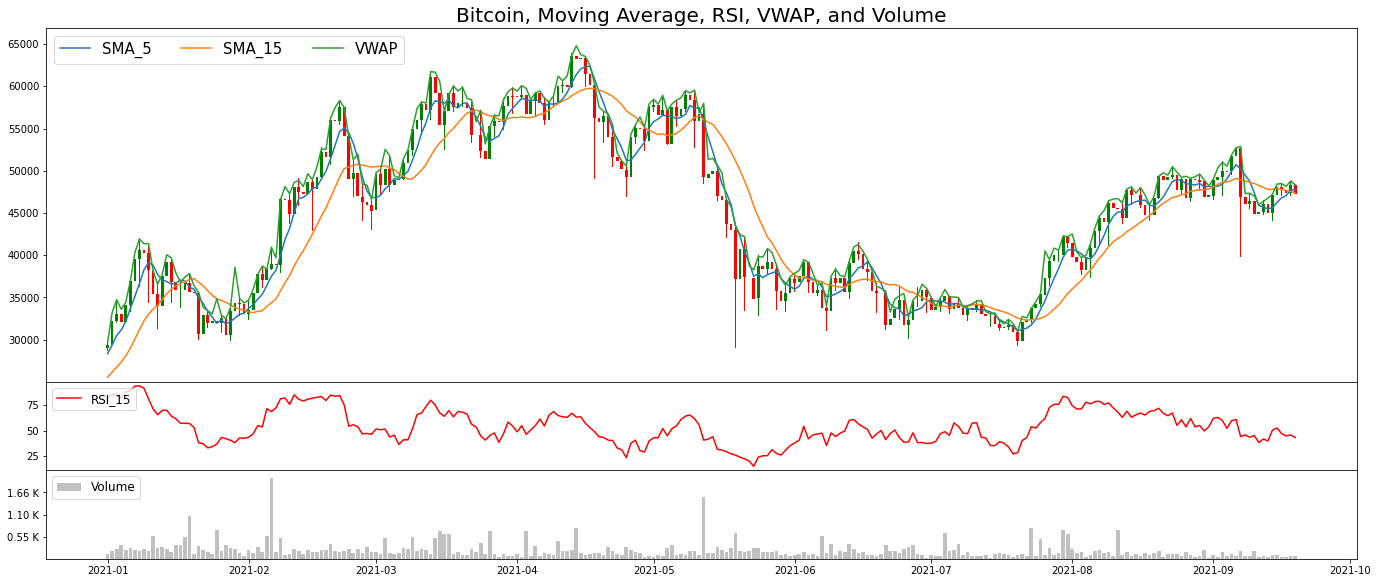

In [11]:
start = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
selected_data = all_data.loc[start:end,['Open','High','Low','Close','SMA_5','SMA_15', 'RSI_15', 'VWAP', 'Volume']]

fig = plt.figure(facecolor = 'white', figsize = (20,10))

def candlestick(t, o, h, l, c):
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), width=0.6, color=color)
    plt.bar(x=t, height=h-l, bottom=l, width=0.1, color=color)

ax0 = plt.subplot2grid((7,4), (1,0), rowspan=4, colspan=4)
candlestick(
    selected_data.index,
    selected_data["Open"],
    selected_data["High"],
    selected_data["Low"],
    selected_data["Close"]
)

ax0.plot(all_data.loc[start:end,['SMA_5','SMA_15', 'VWAP']])
ax0.set_facecolor('white')
ax0.legend(['SMA_5','SMA_15','VWAP'], ncol=3, loc = 'upper left', fontsize = 15)
ax0.axes.get_xaxis().set_visible(False)
plt.title("Bitcoin, Moving Average, RSI, VWAP, and Volume", fontsize = 20)

ax1 = plt.subplot2grid((7,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(selected_data['RSI_15'], color = 'red')
ax1.legend(['RSI_15'], ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('white')
ax1.axes.get_xaxis().set_visible(False)

ax2 = plt.subplot2grid((7,4), (6,0), rowspan=1, colspan=4, sharex = ax0)
ax2.bar(selected_data.index, selected_data['Volume'], color='silver')
# get max volume + 10%
mx = selected_data['Volume'].max()*1.1
# define tick locations - 0 to max in 4 steps
yticks_ax2 = np.arange(0, mx+1, mx/4)
# create labels for ticks. Replace 1.000 by 'K'
yticks_labels_ax2 = ['{:.2f} K'.format(i/1000) for i in yticks_ax2]
ax2.yaxis.tick_left() # Move ticks to the left side
# plot y ticks / skip first and last values (0 and max)
plt.yticks(yticks_ax2[1:-1], yticks_labels_ax2[1:-1])
plt.ylim(0,mx)

ax2.legend(['Volume'],ncol=3, loc = 'upper left', fontsize = 12)
ax2.set_facecolor('white')

plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()